# **Share Market Analysis**


---



Import the CSV file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read csv file
df=pd.read_csv("nifty.csv")

print(df.head(10))


          Date  NIFTY_50_Open  NIFTY_50_High  NIFTY_50_Low  NIFTY_50_Close  \
0  07 May 2025       24233.30       24449.60      24220.00        24414.40   
1  06 May 2025       24500.75       24509.65      24331.80        24379.60   
2  05 May 2025       24419.50       24526.40      24400.65        24461.15   
3  02 May 2025       24311.90       24589.15      24238.50        24346.70   
4  30 Apr 2025       24342.05       24396.15      24198.75        24334.20   
5  29 Apr 2025       24370.70       24457.65      24290.75        24335.95   
6  28 Apr 2025       24070.25       24355.10      24054.05        24328.50   
7  25 Apr 2025       24289.00       24365.45      23847.85        24039.35   
8  24 Apr 2025       24277.90       24347.85      24216.15        24246.70   
9  23 Apr 2025       24357.60       24359.30      24119.95        24328.95   

   Auto_Open  Auto_High  Auto_Low  Auto_Close  Bank_Open  ...    IT_Low  \
0   22436.75   23135.50  22435.30    23114.10   54013.40  ...  354

Date and Time Formats

Changing the date format

In [ ]:
# Change the Date - data type
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')
df['Date'] = df['Date'].apply(np.datetime64)
df['Year'] = df['Date'].dt.year


df=df.sort_values(by='Date',ascending=True)
df.reset_index(drop=True, inplace=True)  # now it reset the index

print(df.head(4))

Check the Null & Dtypes

In [ ]:
# print(df.describe)
print(df.dtypes,"\n")
print( df.isnull().sum(),"\n")

To Get Shape

In [ ]:
shape=df.shape
print(shape)

(2562, 30)


To Get information

In [ ]:
df.info()

To get Particular Column Data

In [ ]:
# select single column form DataFrame

column=df["IT_Open"]
print(column)

In [ ]:
columns = df[['Date',"IT_Open","IT_Close"]]
print(columns)

To get year of Data

In [ ]:
year=df['Year'].unique()
print(year)
# a=year[0]
b=year[-1]
# print(  b )

[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]


To get Statistics Value

In [ ]:
print("Form which price segment do you select: ")
print('Close, Low, High, Open')
a=input("Enter the segment : " ).capitalize().strip()

year=df['Year'].unique()
y_s=year[0]
y_e=year[-1]

if a =="Close" or a=="Low" or a=="High" or a=="Open" :
    print("\n" + "-"*40)
    column_name = [col for col in df.columns if a in col]
    for column in column_name:
        mean_value = df[column].mean().round(2)
        median_value = df[column].median()
        mode_value = df[column].mode()[0]

        to_remove = ['_Close', '_Low', '_High', '_Open']
        for i in to_remove:
          column = column.replace(i, "")

        print(f"Statistics for {column} form {y_s} to {y_e}  :\n")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
        print(f"Mode: {mode_value}")
        print("\n" + "-"*40)

else:
    print("Invalide input....")
    print("your enter should be one of the following: ")

 Overall Return's -- Data

In [ ]:
# Overall Return's -- Data
print("Form which price segment do you select: ")
print('Close, Low, High, Open')
a=input("Enter the Statistics value for each sector : " ).capitalize()
if a =="Close" or a=="Low" or a=="High" or a=="Open" :

    column_name = [col for col in df.columns if any(word in col for word in [a])]
    # print(column_name)

    first_values = df.iloc[0][column_name]
    last_values = df.iloc[-1][column_name]

    returns = ((last_values - first_values) / first_values) * 100


    new= [b.replace(("_"+a), "") for b in column_name]
    returns.index = new
    returns = returns.astype(float).round(2)

    print("\n" + "-"*40)
    print(f"Overall Return (%) based on {a}:".center(40))
    print(f"From the year  {y_s}  to  {y_e}".center(40))
    print( "-"*40,'\n')
    print(returns)
    print("\n" + "-"*40)
else:
    print("Invalide input....")
    print("your enter should be one of the following: ")

Overall Return's -- Chart

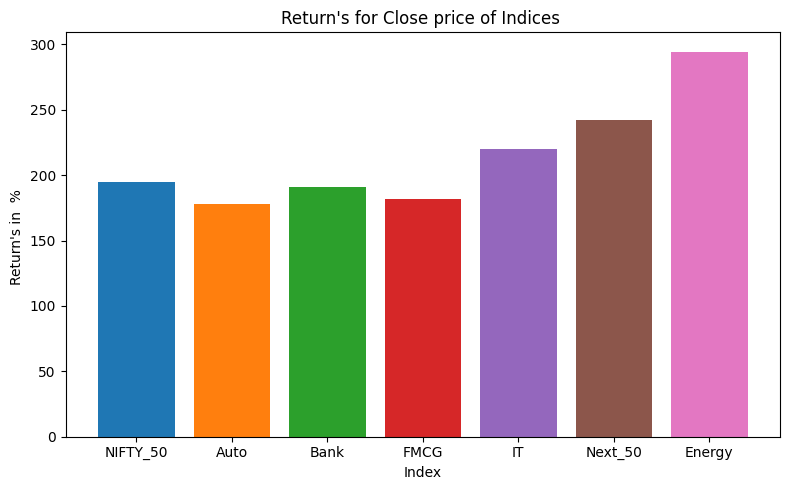

In [ ]:
# Overall Return's -- Chart
import matplotlib.pyplot as plt

indices = new
close_values = returns.tolist()
# print(close_values)

colors = plt.cm.tab10.colors  # 10 distinct colors
bar_colors = [colors[i % len(colors)] for i in range(len(close_values))]

plt.figure(figsize=(8, 5))
plt.bar(indices, close_values, color=bar_colors )  # optional-- width=0.5
plt.title(f"Return's for {a} price of Indices ")
plt.xlabel('Index')
plt.ylabel("Return's in  % ")
plt.tight_layout()
plt.show()


yearly Return's -- Data

In [ ]:
# yearly Return's -- Data

print("Form which price segment do you select: ")
print('Close, Low, High, Open')
a=input("Enter the Statistics value for each sector : " ).capitalize()
if a =="Close" or a=="Low" or a=="High" or a=="Open" :
    column_name = [col for col in df.columns if any(word in col for word in [a])]

    df['Year'] = df['Date'].dt.year

    y_first_values = df.groupby('Year').first()[column_name]
    y_last_values = df.groupby('Year').last()[column_name]
    y_returns = ((y_last_values - y_first_values) / y_first_values) * 100
    y_returns=y_returns.round(2)

    new = [b.replace("_" + a, "") for b in column_name]
    y_returns.columns = new

    print(f"\nYearly Return (%) based on {a}:")
    print(y_returns)
    print("\n" + "-"*60)

    cum = y_returns.cumsum()
    cum=cum.round(3)
    print(f"\nRunning Total of Yearly Returns (%) based on {a}:")
    print(cum)
    print("\n" + "-"*60)

else:
    print("\n" + "-"*40,"\n Invalide input....")
    print("your enter should be one of the following: ")






Form which price segment do you select: 
Close, Low, High, Open
Enter the Statistics value for each sector : high

Yearly Return (%) based on High:
      NIFTY_50   Auto   Bank   FMCG     IT  Next_50  Energy
Year                                                       
2015     -4.09  -0.72  -9.63   0.57  -0.02     6.68   -0.58
2016      2.82   9.94   6.90   2.70  -7.17     6.20   19.42
2017     28.33  28.88  40.10  29.27  12.03    43.76   39.12
2018      3.66 -22.80   6.64  13.98  24.24    -9.35    1.08
2019     12.12  -9.91  17.92  -0.99   8.94     1.05   11.52
2020     14.75  11.36  -2.90  13.47  54.29    14.62    6.60
2021     23.85  17.74  13.42   9.28  58.61    28.81   33.40
2022      3.51  13.94  18.99  18.59 -26.11     0.13   14.36
2023     19.52  47.57  11.74  28.74  24.34    25.89   28.90
2024      8.50  22.41   5.15  -1.14  21.65    27.04    4.53
2025      2.63  -0.14   6.55  -0.65 -17.27    -6.00   -3.74

------------------------------------------------------------

Running T

Yearly return's -- Chart

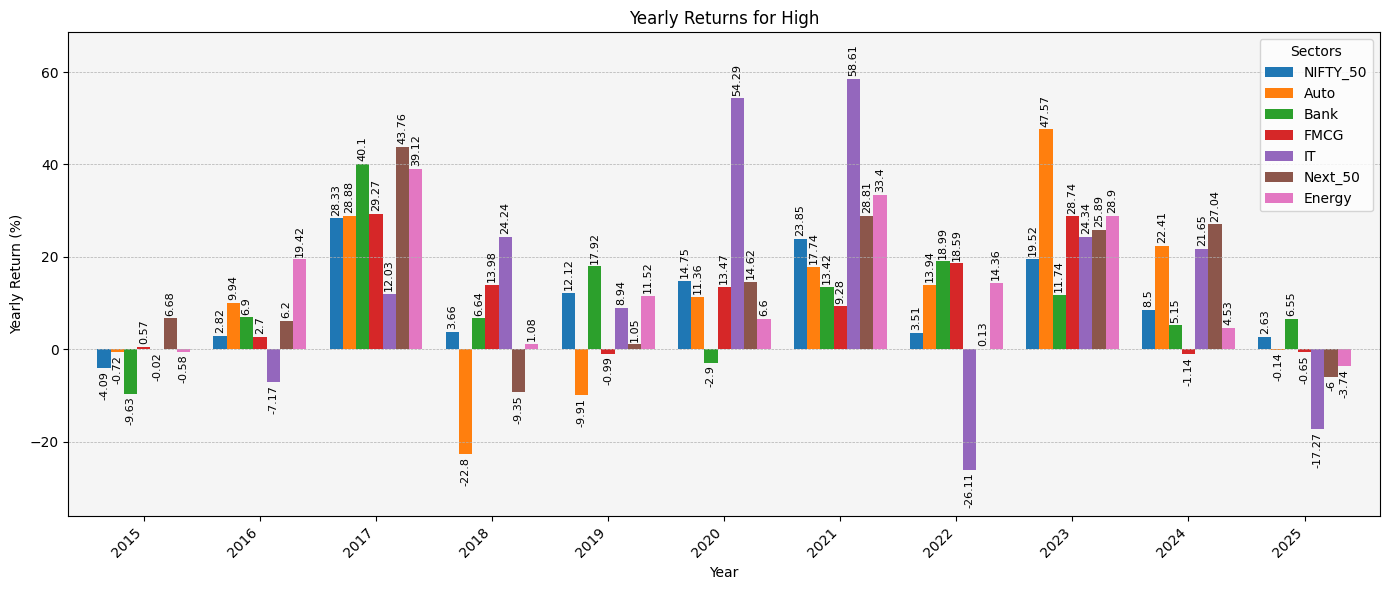

In [ ]:
# Yearly return's -- Chart

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
y_returns.plot(kind='bar', ax=ax, width=0.8)

ax.set_title(f"Yearly Returns for {a}", fontsize=12)
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Yearly Return (%)", fontsize=10)
ax.set_xticklabels(y_returns.index, rotation=45, ha="right")
ax.legend(title="Sectors")

ax.grid(True, axis='y', linestyle='--', linewidth=0.5)  # Grid on y-axis only
ax.set_facecolor('#f5f5f5')  # Optional: Set background color

for container in ax.containers:
    ax.bar_label(container, padding= 2, fontsize=8,rotation=90)
ax.set_ylim(bottom=y_returns.min().min() - 10, top=y_returns.max().max() + 10)
plt.tight_layout()
plt.show()



Yearly cumulative return's -- Chart

In [ ]:
# Yearly cumulative return's -- Chart


plt.figure(figsize=(10, 5))


plt.plot(cum.index, cum['NIFTY_50'], marker='o', label='NIFTY 50', color='blue')
plt.plot(cum.index, cum['Auto'], marker='o', label='Auto', color='red')
plt.plot(cum.index, cum['Bank'], marker='o', label='Bank', color='green')
plt.plot(cum.index, cum['Energy'], marker='o', label='Energy', color='orange')
plt.plot(cum.index, cum['IT'], marker='o', label='IT', color='Black')
plt.plot(cum.index, cum['FMCG'], marker='o', label='FMCG', color='purple')
plt.plot(cum.index, cum['Next_50'], marker='o', label='Next_50', color='brown')

plt.title('Cumulative Yearly Returns for Different Indices')
plt.xlabel('Year')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Yearly cumulative return's -- Heat_map

In [ ]:
# Yearly cumulative return's -- Heat_map
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list( 'r_w_g',["red", "white", "green"])

plt.figure(figsize=(12, 6))

sns.heatmap(cum.T, cmap=cmap, annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Cumulative Yearly Returns for Different Indices in (%)')
plt.xlabel('Year')
plt.ylabel('Indices')

plt.tight_layout()
plt.show()




In [ ]:
print('_'*50+"\n" ,"Quarterly Return (%) based on  Close:","\n" +'_'*50)



Quarterly Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

column_name = [col for col in df.columns if any(keyword in col for keyword in [ 'Close'])]

df['Year_Quarter'] = df['Date'].dt.to_period('Q')

first_values = df.groupby('Year_Quarter').first()[column_name]
last_values = df.groupby('Year_Quarter').last()[column_name]

q_returns = ((last_values - first_values) / first_values) * 100
q_returns=q_returns.round(2)

print("Quarterly Return (%) based on Low and Close:")
print(q_returns.head())






Quarterly Return -- chart

In [ ]:
# Quarterly Return -- chart

columns_to_plot = [col for col in column_name if col in q_returns.columns]
clean_names = [col.replace('_Close', '') for col in columns_to_plot]

for col, name in zip(columns_to_plot, clean_names):
    plt.figure(figsize=(10, 5))

    returns = q_returns[col]

    colors = ['green' if value > 0 else 'red' for value in returns]

    plt.bar(q_returns.index.astype(str), returns, color=colors)

    plt.title(f'Quarterly Returns for {name} (2021–2025)', fontsize=14)
    plt.xlabel('Year and Quarter')
    plt.ylabel('Return (%)')
    plt.xticks(rotation=45)
    # plt.grid(True)
    plt.tight_layout()
    plt.show()

Over all view of All Sector's

In [ ]:
# over all view of all sector's

import pandas as pd
import matplotlib.pyplot as plt



print("From which price segment do you want to select?")
print('Close, Low, High, Open')
a = input("Enter  the Segment : ").capitalize().strip()



sector_columns = [col for col in df.columns if col.endswith(f'_{a}')]

df_plot = df[sector_columns].copy()
df_plot.columns = [col.replace(f'_{a}', '') for col in df_plot.columns]


df_plot.plot(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel(a)
plt.title(f'Sector-wise {a} Prices Over Time')
plt.grid(True)


plt.tight_layout()
plt.show()


Linear Regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

price_features = ['Open', 'High', 'Low', 'Close']
sectors = ['NIFTY_50', 'Auto', 'Bank', 'Energy', 'FMCG', 'IT', 'Next_50']
x_feature = input("Enter the X feature (Open, High, Low, Close): ").capitalize()
y_feature = input("Enter the Y feature (Open, High, Low, Close): ").capitalize()



# check the inputs
if x_feature == y_feature:
    print("X and Y values are the same!")
elif x_feature not in price_features:
    print("Invalid input for X feature.")
elif y_feature not in price_features:
    print("Invalid input for Y feature.")
else:

    regression_results={}

    for sector in sectors:
        x_col = f'{sector}_{x_feature}'
        y_col = f'{sector}_{y_feature}'

        if x_col in df.columns and y_col in df.columns:
            X = df[[x_col]]
            y = df[y_col]

            # Fit model
            model = LinearRegression()
            model.fit(X, y)

            slope = model.coef_[0]
            intercept = model.intercept_
            regression_results[sector] = {'slope': slope , 'intercept': intercept}


        else:
            print(f"Skipping {sector}: missing column(s) for {x_feature} or {y_feature}.")


    print("\nLinear Regression Coefficients:")
    for sector, values in regression_results.items():
        print()
        print(f"{sector}: Slope = {values['slope']:.4f}, Intercept = {values['intercept']:.4f}")




Linear Regression  R2 score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


price_features = ['Open', 'High', 'Low', 'Close']
sectors = ['NIFTY_50', 'Auto', 'Bank', 'Energy', 'FMCG', 'IT', 'Next_50']


x_feature = input("Enter the X feature (Open, High, Low, Close): ").capitalize()
y_feature = input("Enter the Y feature (Open, High, Low, Close): ").capitalize()

# Check the  inputs
if x_feature == y_feature:
    print("X and Y values are the same!")
elif x_feature not in price_features:
    print("Invalid input for X feature.")
elif y_feature not in price_features:
    print("Invalid input for Y feature.")
else:
    regression_results = {}

    for sector in sectors:
        x_col = f'{sector}_{x_feature}'
        y_col = f'{sector}_{y_feature}'

        if x_col in df.columns and y_col in df.columns:
            X = df[[x_col]]
            y = df[y_col]

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Fit model for train
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)

            slope = model.coef_[0]
            intercept = model.intercept_
            regression_results[sector] = {
                'slope': slope,
                'intercept': intercept,
                'r2_score': r2
            }
        else:
            print(f"Skipping {sector}: missing column(s) for {x_feature} or {y_feature}.")

 # print all the data
    print("\nLinear Regression  for all sector :")
    for sector, values in regression_results.items():
        print(f"{sector}: Slope = {values['slope']:.4f}, Intercept = {values['intercept']:.4f}, R² Score = {values['r2_score']:.4f}")


Plotting regression lines for each sector

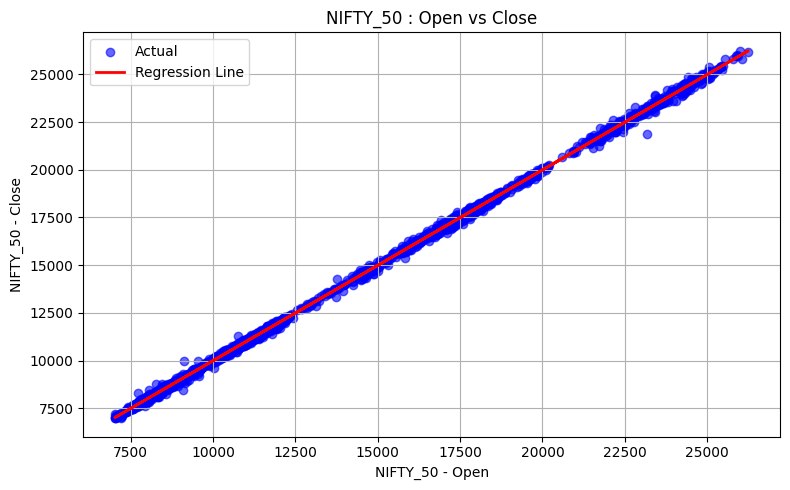

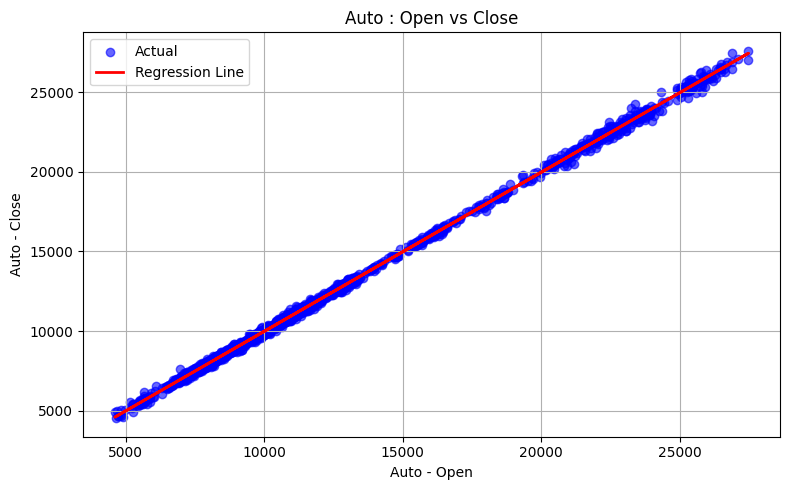

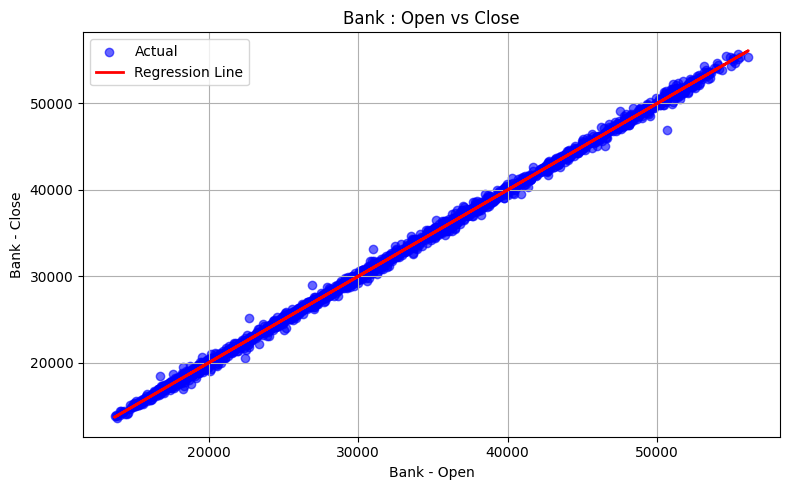

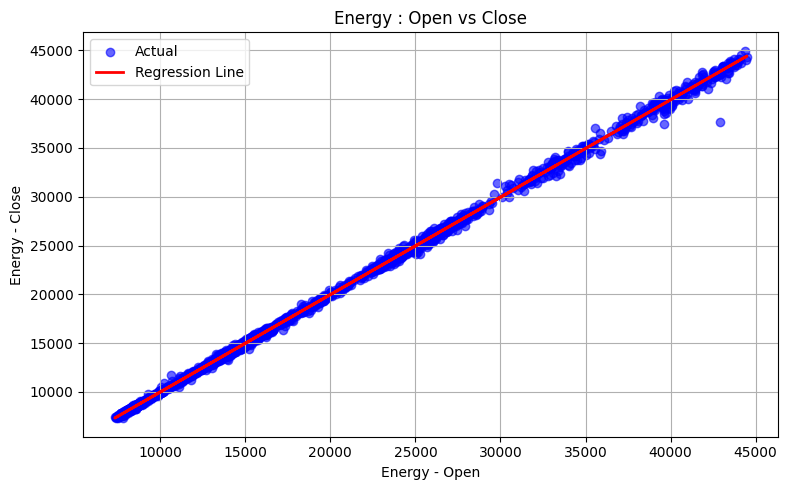

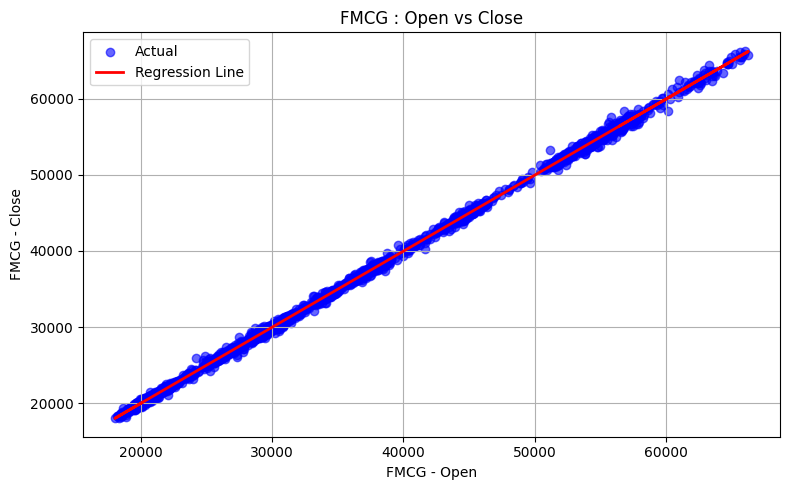

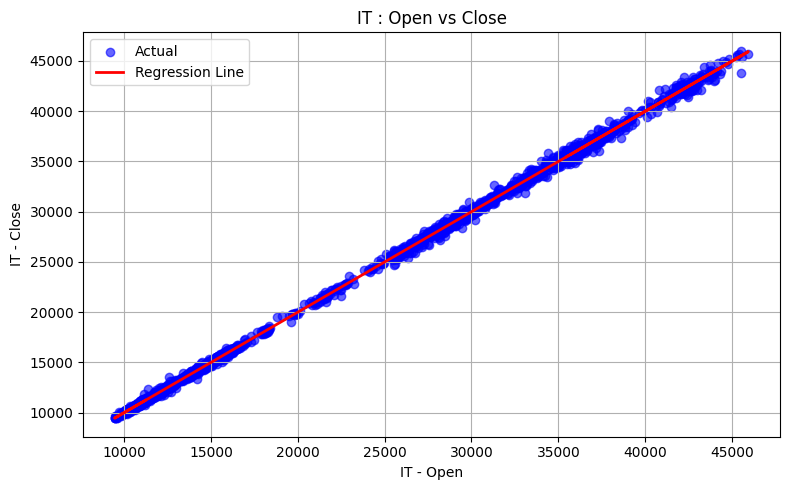

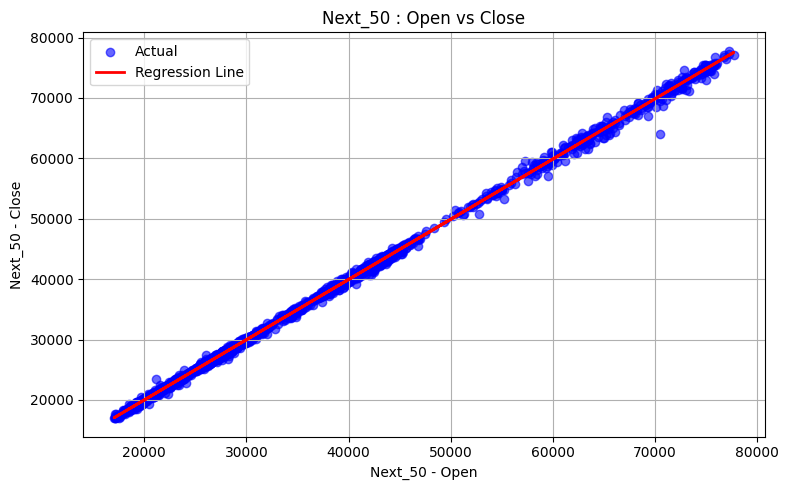

In [ ]:
# Plotting regression lines for each sector

for sector in regression_results.keys():
    x_col = f'{sector}_{x_feature}'
    y_col = f'{sector}_{y_feature}'

    X = df[[x_col]]
    y = df[y_col]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'{sector} : {x_feature} vs {y_feature}')
    plt.xlabel(f'{sector} - {x_feature}')
    plt.ylabel(f'{sector} - {y_feature}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv('nifty.csv')
print(df.head())

price_features = ['Open', 'High', 'Low', 'Close']
sectors = ['NIFTY_50', 'Auto', 'Bank', 'Energy', 'FMCG', 'IT', 'Next_50']


x_feature = input("Enter the X feature (Open, High, Low, Close): ").capitalize()
y_feature = input("Enter the Y feature (Open, High, Low, Close): ").capitalize()
sectors= input()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Your data should already be loaded like this:
df = pd.read_csv("nifty.csv")

# Valid feature and sector names
features = ['Open', 'High', 'Low', 'Close']
sectors = ['NIFTY_50', 'AUTO', 'Bank', 'Energy', 'FMCG', 'IT', 'Next_50']

# User input
x_feature = input("Enter the X feature (Open, High, Low, Close): ").capitalize()
y_feature = input("Enter the Y feature (Open, High, Low, Close): ").capitalize()
sector = input("Enter the sector (NIFTY_50, Auto, Bank, Energy, FMCG, IT, Next_50): ").strip()

# Basic input checks
if x_feature == y_feature:
    print("X and Y features must be different.")
elif x_feature not in features or y_feature not in features:
    print("Invalid feature name entered.")
elif sector not in sectors:
    print("Invalid sector name entered.")
else:

    x_col = sector + "_" + x_feature
    y_col = sector + "_" + y_feature

    # check the column present in df
    if x_col in df.columns and y_col in df.columns:
        X = df[[x_col]]
        y = df[y_col]

         # # Train the model
        # model = LinearRegression()
        # model.fit(X, y)


         # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit model for train
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)



        # Print model information
        slope = model.coef_[0]
        intercept = model.intercept_
        print("\nLinear Regression Model for", sector)
        print("Slope:", round(slope, 4))
        print("Intercept:", round(intercept, 4))

        # New prediction

        new_x =float( input(f"\nEnter a new value to predict {y_feature}: "))

        new_input_df = pd.DataFrame({x_col: [new_x]})
        predicted_y = model.predict(new_input_df)[0]
        print(f"Predicted {y_feature}  = {round(predicted_y, 2)}")

    else:
        print(f"Columns '{x_col}' or '{y_col}' not found in the data.")


Plotting

In [ ]:
# Plotting
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter([new_x], [predicted_y], color='green', s=100, label='Your Prediction')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"{sector}: {y_feature} vs {x_feature}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
